In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv('livers.csv').drop(columns=['selector'])

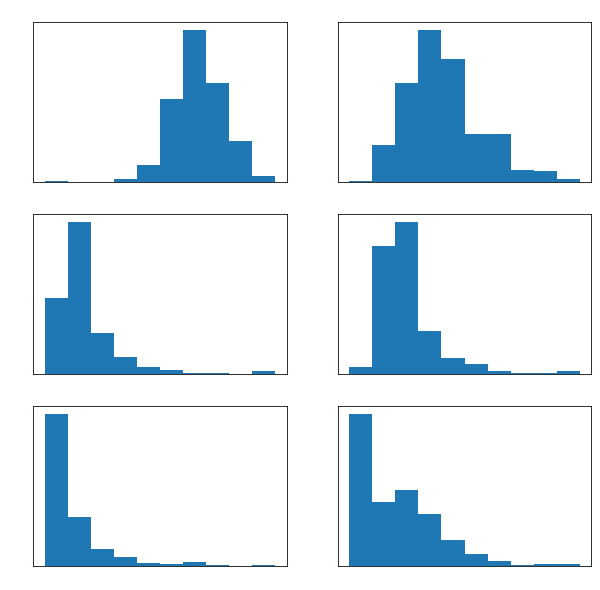

In [22]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
ax = axes.ravel()

plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'

for feature, i in zip(df.columns, range(len(df.columns))):
    ax[i].hist(df[feature])
    ax[i].set_title(feature)

we might want to log transform sgpt, gammagt, and drinks. The others look fairly normal.

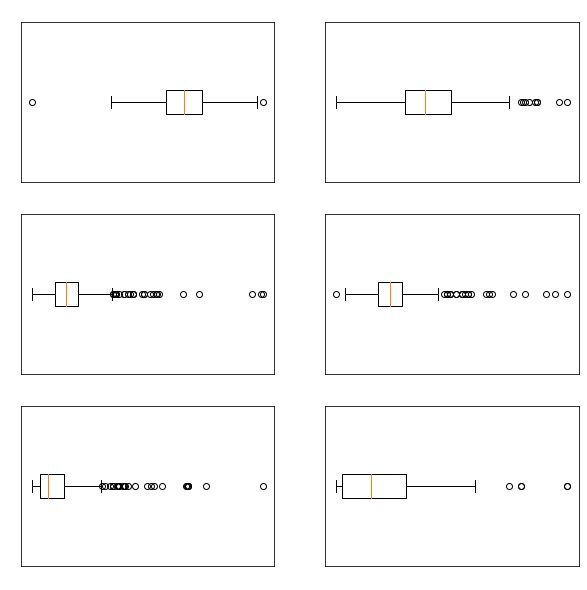

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10,10))
ax = axes.ravel()

for feature, i in zip(df.columns, range(len(df.columns))):
    ax[i].boxplot(df[feature], vert=False)
    ax[i].set_title(feature)

Mcv looks pretty normal except for that one outlier. alkphos looks normal too except for the outliers.

Now pairplot for correlations

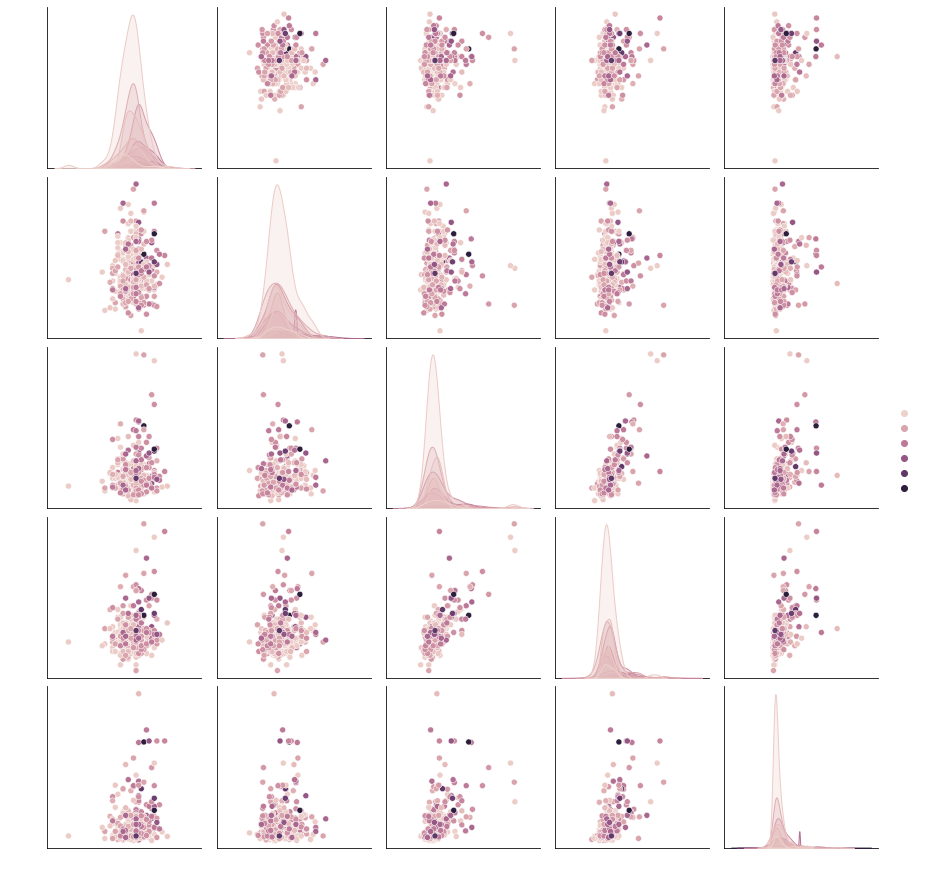

In [31]:
sns.pairplot(df, hue='drinks')

In [28]:
df.corr().style.background_gradient(cmap='viridis')

,mcv,alkphos,sgpt,sgot,gammagt,drinks
mcv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224
drinks,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000


what i want to try:<br>
- linear regression without any prescaling to get a benchmark<br>
train $R^2 = .200$<br>
- then do some scaling to get the values normal<br>
train $R^2 = .158$ :( <br>
- try scaling the target feature<br>
train $R^2 = .087$ is this even R^2??<br>
- tried again with standard scaling the rest<br>
train $R^2 = .144$ <br> 
- then try some interaction terms<br>
train $R^2 = .331$ <br>
- then try some automatic feature selection<br>
made things worse <br>
- try poisson regression<br>
- grid search <br>
grid search is giving pretty good RMSE at 2.88 so far <br>
TEST RMSE with optimized PoissonRegressor is 3.059<br>

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
lm = LinearRegression()
estimators = [('lm', lm)]
pipe = Pipeline(estimators)

In [35]:
pipe

Pipeline(steps=[('lm', LinearRegression())])

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=['drinks']),
                                                df['drinks'], test_size=.33,
                                               random_state=0)

In [41]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('lm', LinearRegression())])

In [45]:
# this is R^2 score and its... awful. Lets try transforming.
pipe.score(xtrain, ytrain)

0.2008831369285461

what would a log transform of gammagt look like?

<AxesSubplot:xlabel='gammagt', ylabel='Count'>

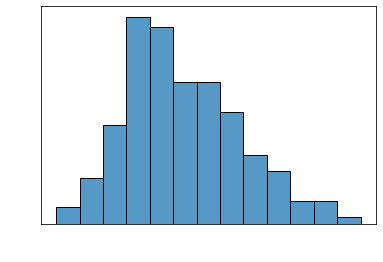

In [50]:
sns.histplot(np.log10(df['gammagt']))

/usr/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gammagt'>

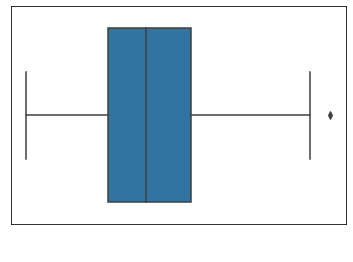

In [51]:
sns.boxplot(np.log10(df['gammagt']))

log transform drinks. Nope. I wonder if its poisson. Try something else on it later

/usr/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='drinks', ylabel='Count'>

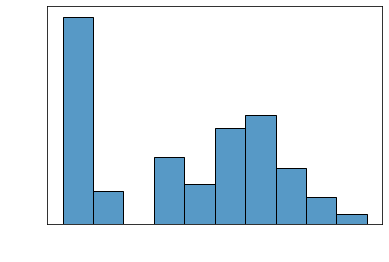

In [52]:
sns.histplot(np.log10(df['drinks']))

<AxesSubplot:xlabel='sgot', ylabel='Count'>

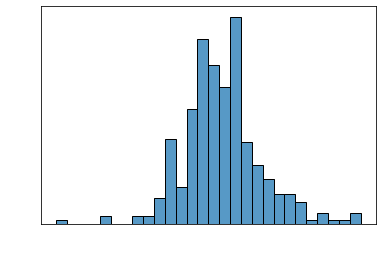

In [53]:
sns.histplot(np.log10(df['sgot']))

<AxesSubplot:xlabel='sgpt', ylabel='Count'>

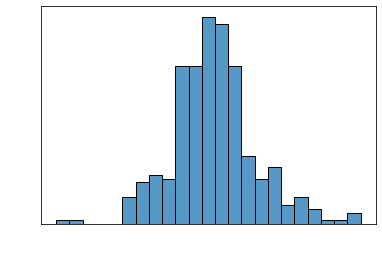

In [56]:
sns.histplot(np.log10(df['sgpt']))

In [59]:
df[df['mcv'] == min(df['mcv'])]

,mcv,alkphos,sgpt,sgot,gammagt,drinks
223,65,63,19,20,14,0.5


<AxesSubplot:xlabel='mcv', ylabel='Count'>

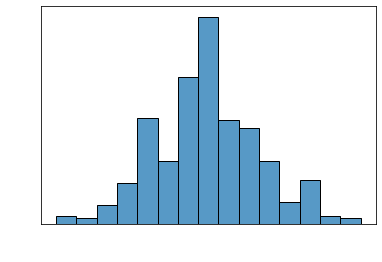

In [62]:
sns.histplot(df.drop(index=223, axis=0)['mcv'])